# Exploring and Analyzing IMDb's data

#### Problem statement: To explore and analyze IMDb's data by cleaning and EDA to gain insights and then further analyze movie directors.

The source of the data is the IMDb website and after getting from there saved in the .db format. Database name is Db-IMDB.db. 

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

### Movie

In [2]:
conne = sqlite3.connect("Db-IMDB.db")

sql_query_movie = """SELECT * FROM Movie"""
imdb_movie = pd.read_sql_query(sql_query_movie, conne)

# First few rows of imdb_movie
imdb_movie.head()

,index,MID,title,year,rating,num_votes
0,0,tt2388771,Mowgli,2018,6.6,21967
1,1,tt5164214,Ocean's Eight,2018,6.2,110861
2,2,tt1365519,Tomb Raider,2018,6.4,142585
3,3,tt0848228,The Avengers,2012,8.1,1137529
4,4,tt8239946,Tumbbad,2018,8.5,7483


In [3]:
# Dropping 'index' column from imdb_movie
imdb_movie.drop('index', axis=1, inplace=True)

In [4]:
# Last few rows of imdb_movie
imdb_movie.tail()

,MID,title,year,rating,num_votes
3468,tt0090611,Allah-Rakha,1986,6.2,96
3469,tt0106270,Anari,1993,4.7,301
3470,tt0852989,Come December,2006,5.7,57
3471,tt0375882,Kala Jigar,1939,3.3,174
3472,tt0375890,Kanoon,1994,3.2,103


In [5]:
print("imdb_movie shape:", imdb_movie.shape)
print("imdb_movie size:", imdb_movie.size)
print("imdb_movie columns:", imdb_movie.columns)
print("imdb_movie dimensions:", imdb_movie.ndim)
print("imdb_movie index:", imdb_movie.index)

imdb_movie shape: (3473, 5)
imdb_movie size: 17365
imdb_movie columns: Index(['MID', 'title', 'year', 'rating', 'num_votes'], dtype='object')
imdb_movie dimensions: 2
imdb_movie index: RangeIndex(start=0, stop=3473, step=1)


In [6]:
# Info of imdb_movie
imdb_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3473 entries, 0 to 3472
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MID        3473 non-null   object 
 1   title      3473 non-null   object 
 2   year       3473 non-null   object 
 3   rating     3473 non-null   float64
 4   num_votes  3473 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 135.8+ KB


In [7]:
# Statistical analysis using describe
imdb_movie.describe(include='all')

,MID,title,year,rating,num_votes
count,3473,3473,3473,3473.000000,3.473000e+03
unique,3473,3342,125,NaN,NaN
top,tt2388771,Guru,2005,NaN,NaN
freq,1,3,128,NaN,NaN
mean,NaN,NaN,NaN,6.037115,4.547316e+03
std,NaN,NaN,NaN,1.402919,2.958851e+04
min,NaN,NaN,NaN,1.300000,5.100000e+01
25%,NaN,NaN,NaN,5.100000,1.200000e+02
50%,NaN,NaN,NaN,6.200000,3.890000e+02
75%,NaN,NaN,NaN,7.100000,1.859000e+03


In [8]:
# Number of unique values in each column
imdb_movie.nunique()

MID          3473
title        3342
year          125
rating         82
num_votes    1763
dtype: int64

In [9]:
# Unique values in the 'MID' column
imdb_movie['MID'].unique()

array(['tt2388771', 'tt5164214', 'tt1365519', ..., 'tt0852989',
       'tt0375882', 'tt0375890'], dtype=object)

In [10]:
# Unique values in the 'title' column
imdb_movie['title'].unique()

array(['Mowgli', "Ocean's Eight", 'Tomb Raider', ..., 'Allah-Rakha',
       'Come December', 'Kala Jigar'], dtype=object)

In [11]:
# Unique values in the 'year' column
imdb_movie['year'].unique()

array(['2018', '2012', '2016', '2017', '2008', 'I 2009', '1977', '2013',
       '2015', '2007', '2002', '1951', '2009', '2014', '2004', '1997',
       '1983', '1994', '2011', '1996', '2001', '2010', '2006', '1971',
       'I 2018', 'XVII 2016', '1958', 'I 2017', '1984', '1987', 'II 2018',
       '2005', 'I 2002', 'III 2016', '2003', '1995', '1998', 'I 2015',
       '1975', '1939', '2000', '1988', 'I 2016', 'I 2006', 'I 2010',
       'I 2013', 'I 2014', 'II 2017', '1991', '1993', '1981', '1989',
       '1976', '1959', '1970', 'VI 2015', '1979', 'I 1964', '1999',
       'I 2003', 'III 2017', 'I 2005', 'I 2008', '1990', '1992', 'I 2007',
       'I 2011', '1957', '1980', '1966', '1967', '1973', 'I 1997', '1968',
       '1969', '1982', 'III 2015', '1978', '1965', '1972', '1956', '1974',
       '1960', '1985', 'II 2012', '1986', '1949', '1964', 'III 2007',
       '1955', 'II 2010', '1961', '1962', 'II 2013', 'I 1986', 'I 1968',
       '1954', 'I 1980', '1941', 'II 2008', 'I 1983', 'V 2015', 

In [12]:
# Unique values in the 'rating' column
imdb_movie['rating'].unique()

array([6.6, 6.2, 6.4, 8.1, 8.5, 5.5, 7.8, 9. , 5.7, 5.3, 8. , 5.8, 2.4,
       7.7, 7.5, 7.9, 5.6, 3.6, 8.2, 7.1, 7.2, 5.9, 6.7, 7. , 2.6, 7.3,
       7.4, 8.4, 6.8, 7.6, 6. , 2.9, 8.8, 8.3, 2.1, 3.3, 4.4, 4.6, 5.2,
       6.9, 3.7, 6.5, 3.1, 4.5, 5.4, 4.2, 6.1, 6.3, 4. , 4.1, 2.3, 4.8,
       5.1, 1.3, 8.6, 4.3, 3.4, 3.2, 3.9, 4.9, 5. , 3. , 4.7, 8.9, 3.8,
       2.2, 1.9, 1.7, 1.8, 2.8, 2.7, 3.5, 2.5, 2. , 8.7, 9.3, 9.2, 1.6,
       9.4, 9.1, 9.6, 9.5])

In [13]:
# Unique values in the 'num_votes' column
imdb_movie['num_votes'].unique()

array([ 21967, 110861, 142585, ...,    664,   1030,    509], dtype=int64)

In [14]:
# Value count of the 'MID' column
imdb_movie['MID'].value_counts()

tt2388771    1
tt0286907    1
tt0070097    1
tt0264415    1
tt0140784    1
            ..
tt1372266    1
tt0110140    1
tt3422462    1
tt0345177    1
tt0375890    1
Name: MID, Length: 3473, dtype: int64

In [15]:
# Value count of 'title' column
imdb_movie['title'].value_counts()

Guru                3
Ittefaq             3
Devdas              3
Andaz               3
Baazi               3
                   ..
Khandan             1
Paap Ki Duniya      1
Shor in the City    1
Fida                1
Kala Jigar          1
Name: title, Length: 3342, dtype: int64

In [16]:
# Value count of the 'year' column
imdb_movie['year'].value_counts()

2005       128
2013       127
2014       118
2016       118
2017       118
          ... 
II 2008      1
I 1983       1
V 2015       1
I 2006       1
II 2009      1
Name: year, Length: 125, dtype: int64

In [17]:
# Value count of the 'rating' column
imdb_movie['rating'].value_counts()

7.2    145
7.1    141
7.0    121
6.9    116
6.8    114
      ... 
1.3      1
8.9      1
1.6      1
9.1      1
9.5      1
Name: rating, Length: 82, dtype: int64

In [18]:
# Value count of the 'num_votes' column
imdb_movie['num_votes'].value_counts()

52      27
51      27
53      25
60      25
69      21
        ..
2999     1
4470     1
2315     1
2334     1
509      1
Name: num_votes, Length: 1763, dtype: int64

52 and 51 has the highest count

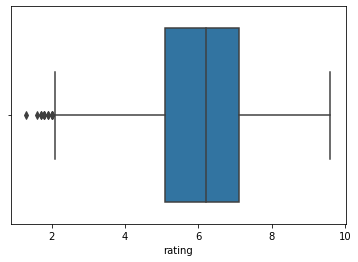

In [19]:
# boxplot of the 'rating' column from imdb_movie
sns.boxplot(data=imdb_movie, x='rating')
plt.show()

Few outliers are present in the 'rating' column

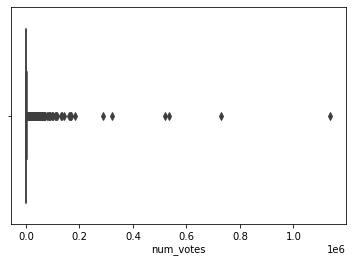

In [20]:
# boxplot of the 'num_votes' column from imdb_movie 
sns.boxplot(data=imdb_movie, x='num_votes')
plt.show()

To better visualize the data need to apply log transform

In [21]:
# Creating a new column 'log_num_votes' where log transform is applied on 'num_votes'
imdb_movie['log_num_votes'] = np.log(imdb_movie['num_votes'])

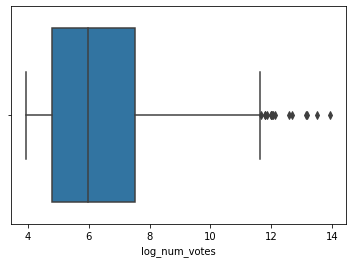

In [22]:
# boxplot of 'log_num_votes' column from imdb_movie 
sns.boxplot(data = imdb_movie, x='log_num_votes')
plt.show()

Few outliers are present in the 'log_num_votes' column

In [23]:
# Checking for null values in imdb_movie
imdb_movie.isna().sum()

MID              0
title            0
year             0
rating           0
num_votes        0
log_num_votes    0
dtype: int64

Null values are not present in any columns

In [24]:
# Checking for duplicate rows in imdb_movie
imdb_movie[imdb_movie.duplicated()]

,MID,title,year,rating,num_votes,log_num_votes


No duplicate rows found in imdb_movie

In [25]:
# Creating a new column 'n_year' in imdb_movie where only year is present
imdb_movie['n_year'] = imdb_movie['year'].str.split(' ').str[-1]

# Converting 'n_year' column to int64 datatype
imdb_movie['n_year'] = imdb_movie['n_year'].astype('int64')

In [26]:
# Unique values in the 'n_year' column
imdb_movie['n_year'].unique()

array([2018, 2012, 2016, 2017, 2008, 2009, 1977, 2013, 2015, 2007, 2002,
       1951, 2014, 2004, 1997, 1983, 1994, 2011, 1996, 2001, 2010, 2006,
       1971, 1958, 1984, 1987, 2005, 2003, 1995, 1998, 1975, 1939, 2000,
       1988, 1991, 1993, 1981, 1989, 1976, 1959, 1970, 1979, 1964, 1999,
       1990, 1992, 1957, 1980, 1966, 1967, 1973, 1968, 1969, 1982, 1978,
       1965, 1972, 1956, 1974, 1960, 1985, 1986, 1949, 1955, 1961, 1962,
       1954, 1941, 1963, 1931, 1953, 1948, 1952, 1947, 1936, 1946, 1943,
       1950], dtype=int64)

In [27]:
# Value count of the 'n_year' column
imdb_movie['n_year'].value_counts()

2013    136
2016    129
2005    129
2017    126
2014    126
       ... 
1946      2
1950      2
1941      1
1931      1
1943      1
Name: n_year, Length: 78, dtype: int64

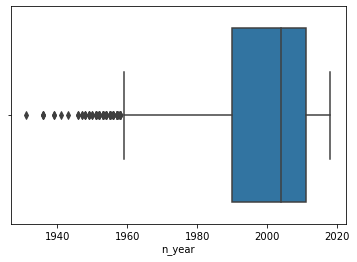

In [28]:
# boxplot of 'n_year' column from imdb_movie
sns.boxplot(data=imdb_movie, x='n_year')
plt.show()

Outliers are present in the 'n_year' column

### Treating outliers

#### Outliers in the 'rating' column
- The rating's all the range values even the small and the large values are essential in analyzing the movie.
- It might help in understanding if the movie has done well. And whether other aspects involved in the analysis has done well.
- So outliers in the 'rating' column are not removed.

#### Outliers in the 'num_votes' column
- The highest values and lowest values in this column might help in the analysis.
- So outliers in the 'num_votes' column are not removed.

#### Outliers in  the 'n_year' column

In [29]:
# Treating outliers in the 'n_year' column
qua_75 = imdb_movie['n_year'].quantile(0.75)
qua_25 = imdb_movie['n_year'].quantile(0.25)
n_yr_iqr = qua_75 - qua_25 
Up_b = qua_75 + 1.5 * n_yr_iqr
Lo_b = qua_25 - 1.5 * n_yr_iqr
imdb_movie = imdb_movie[(imdb_movie['n_year']>Lo_b)&(imdb_movie['n_year']<Up_b)]

**Univariate analysis**

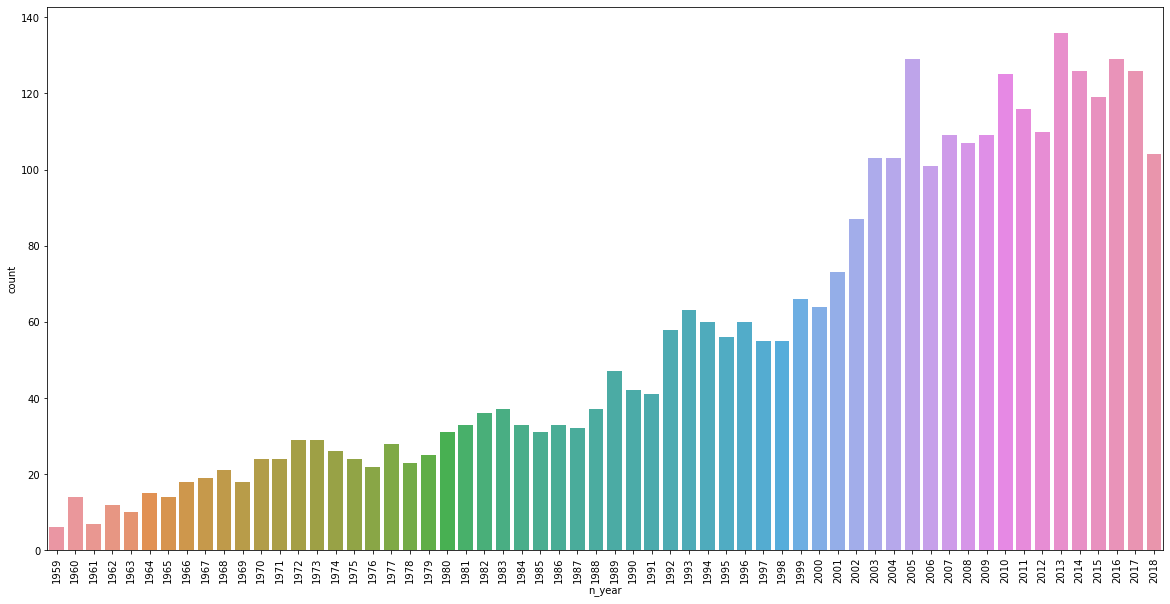

In [30]:
# Count plot of 'n_year' column
plt.figure(figsize=(20, 10))
sns.countplot(data=imdb_movie, x='n_year')
plt.xticks(rotation=90)
plt.show()

Over the years the number of movies is increasing

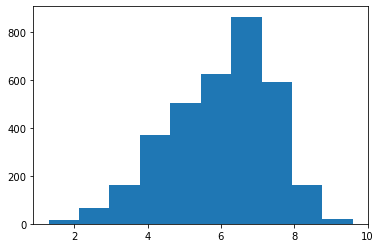

In [31]:
# Histogram of the 'rating' column
plt.hist(data=imdb_movie, x='rating')
plt.show()

The highest number of values is between 6-7 

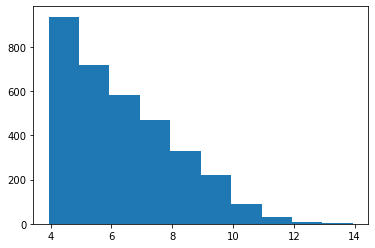

In [32]:
# Histogram of the 'log_num_votes' column
plt.hist(data=imdb_movie, x='log_num_votes')
plt.show()

In the range of 4-6 high count of the 'log_num_votes' column's values are

In [33]:
# Writing a function to create bins of rating 
def bin_colm_val(clm_val):
    if clm_val >= 0 and clm_val <=5:
        return "1-5 rating"
    else:
        return "6-10 rating"

# Creating a column 'bin_rating' in imdb_movie
imdb_movie['bin_rating'] = imdb_movie['rating'].apply(bin_colm_val)
imdb_movie['bin_rating'].head()

0    6-10 rating
1    6-10 rating
2    6-10 rating
3    6-10 rating
4    6-10 rating
Name: bin_rating, dtype: object

In [34]:
# Unique values in the 'bin_rating' column from imdb_movie
imdb_movie['bin_rating'].unique()

array(['6-10 rating', '1-5 rating'], dtype=object)

In [35]:
# Value count of the 'bin_rating' column
imdb_movie['bin_rating'].value_counts()

6-10 rating    2560
1-5 rating      830
Name: bin_rating, dtype: int64

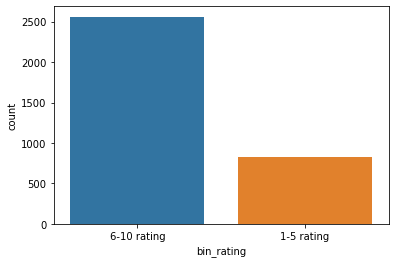

In [36]:
# Countplot of 'bin_rating' column
sns.countplot(data=imdb_movie, x='bin_rating')
plt.show()

The count of 6-10 rating movies is more than 1-5 rating

**Bivariate analysis**

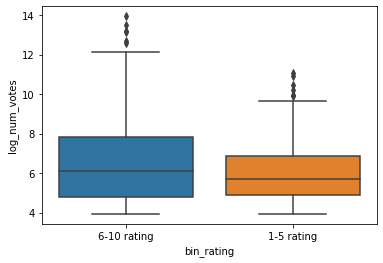

In [37]:
# boxplot of 'bin_rating' and 'log_num_votes' columns from imdb_movie
sns.boxplot(data=imdb_movie, x='bin_rating', y='log_num_votes')
plt.show()

'1-5 rating' has a lower median than '6-10 rating'

### Person

In [38]:
sql_query_person = """SELECT * FROM Person"""
imdb_person = pd.read_sql_query(sql_query_person, conne)

# First few rows of imdb_person
imdb_person.head()

,index,PID,Name,Gender
0,0,nm0000288,Christian Bale,Male
1,1,nm0000949,Cate Blanchett,Female
2,2,nm1212722,Benedict Cumberbatch,Male
3,3,nm0365140,Naomie Harris,Female
4,4,nm0785227,Andy Serkis,Male


In [39]:
# Dropping 'index' column from imdb_person
imdb_person.drop('index', axis=1, inplace=True)

In [40]:
# Last few rows of imdb_person
imdb_person.tail()

,PID,Name,Gender
37561,nm2182643,Kamika Verma,None
37562,nm1029114,Dhorairaj Bhagavan,None
37563,nm3769883,Nasir Shaikh,None
37564,nm1470989,Kannan,None
37565,nm0298158,Adrian Fulle,None


In [41]:
print("imdb_person shape:", imdb_person.shape)
print("imdb_person size:", imdb_person.size)
print("imdb_person columns:", imdb_person.columns)
print("imdb_person dimensions:", imdb_person.ndim)
print("imdb_person index:", imdb_person.index)

imdb_person shape: (37566, 3)
imdb_person size: 112698
imdb_person columns: Index(['PID', 'Name', 'Gender'], dtype='object')
imdb_person dimensions: 2
imdb_person index: RangeIndex(start=0, stop=37566, step=1)


In [42]:
# Info of imdb_person
imdb_person.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37566 entries, 0 to 37565
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   PID     37565 non-null  object
 1   Name    37565 non-null  object
 2   Gender  29341 non-null  object
dtypes: object(3)
memory usage: 880.6+ KB


In [43]:
# Statistical analysis using describe
imdb_person.describe(include='all')

,PID,Name,Gender
count,37565,37565,29341
unique,37565,35599,2
top,nm0000288,Rajesh,Male
freq,1,12,19925


In [44]:
# Number of unique values in each column
imdb_person.nunique()

PID       37565
Name      35599
Gender        2
dtype: int64

In [45]:
# Unique values in the 'PID' column
imdb_person['PID'].unique()

array(['nm0000288', 'nm0000949', 'nm1212722', ..., 'nm3769883',
       'nm1470989', 'nm0298158'], dtype=object)

In [46]:
# Unique values in the 'Name' column
imdb_person['Name'].unique()

array([' Christian Bale', ' Cate Blanchett', ' Benedict Cumberbatch', ...,
       'Nasir Shaikh', 'Kannan', 'Adrian Fulle'], dtype=object)

In [47]:
# Unique values in the 'Gender' column
imdb_person['Gender'].unique()

array(['Male', 'Female', None], dtype=object)

In [48]:
# Value count of the 'PID' column
imdb_person['PID'].value_counts()

nm0000288    1
nm1624623    1
nm0045140    1
nm0457253    1
nm1007338    1
            ..
nm0619684    1
nm0465930    1
nm0318693    1
nm0594104    1
nm0298158    1
Name: PID, Length: 37565, dtype: int64

In [49]:
# Value count of the 'Name' column
imdb_person['Name'].value_counts()

 Rajesh              12
 Rahul               11
 Imran Khan          10
 Deepak               9
 Sanjay               8
                     ..
 Avinash Nemade       1
 Agesh Markam         1
 Khunni Lal Maina     1
 Lakshmi              1
Adrian Fulle          1
Name: Name, Length: 35599, dtype: int64

In [50]:
# Value count of the 'Gender' column
imdb_person['Gender'].value_counts()

Male      19925
Female     9416
Name: Gender, dtype: int64

In [51]:
# Checking for null values in imdb_person
imdb_person.isna().sum()

PID          1
Name         1
Gender    8225
dtype: int64

Null values are present in all the columns

In [52]:
# Dropping null rows
imdb_person.dropna(how='all', inplace=True)

# Treating null values in imdb_person
imdb_person['Gender'] = imdb_person['Gender'].fillna('Unknown')

# Again checking for null values in imdb_person
imdb_person.isna().sum()

PID       0
Name      0
Gender    0
dtype: int64

In [53]:
# Checking for duplicate rows in imdb_person
imdb_person[imdb_person.duplicated()]

,PID,Name,Gender


No duplicate rows found in imdb_person

In [54]:
# Removing empty space seen at the start of the string 
imdb_person['Name'] = imdb_person['Name'].str.strip(' ')

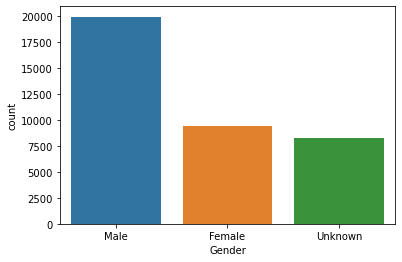

In [55]:
# Count plot of 'Gender' column
sns.countplot(data=imdb_person, x='Gender')
plt.show()

The count of the 'Male' is greater than the 'Female' count

### Genre

In [56]:
sql_query_genre = """SELECT * FROM Genre"""
imdb_genre = pd.read_sql_query(sql_query_genre, conne)

# First few rows of imdb_genre
imdb_genre.head()

,index,Name,GID
0,0,"Adventure, Drama, Fantasy",0
1,1,"Action, Comedy, Crime",1
2,2,"Action, Adventure, Fantasy",2
3,3,"Action, Adventure, Sci-Fi",3
4,4,"Drama, Horror, Thriller",4


In [57]:
# Dropping 'index' column from imdb_genre
imdb_genre.drop('index', axis=1, inplace=True)

In [58]:
# Last few rows of imdb_genre
imdb_genre.tail()

,Name,GID
323,"Animation, Adventure, Fantasy",323
324,"Biography, Drama, War",324
325,"Animation, Drama, Adventure",325
326,"Drama, Action",326
327,"Drama, Mystery, Sci-Fi",327


In [59]:
print("imdb_genre shape:", imdb_genre.shape)
print("imdb_genre size:", imdb_genre.size)
print("imdb_genre columns:", imdb_genre.columns)
print("imdb_genre dimensions:", imdb_genre.ndim)
print("imdb_genre index:", imdb_genre.index)

imdb_genre shape: (328, 2)
imdb_genre size: 656
imdb_genre columns: Index(['Name', 'GID'], dtype='object')
imdb_genre dimensions: 2
imdb_genre index: RangeIndex(start=0, stop=328, step=1)


In [60]:
# Info of imdb_genre
imdb_genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    328 non-null    object
 1   GID     328 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [61]:
# Statistical analysis using describe
imdb_genre.describe(include='all')

,Name,GID
count,328,328.000000
unique,328,NaN
top,"Adventure, Drama, Fantasy",NaN
freq,1,NaN
mean,NaN,163.500000
std,NaN,94.829672
min,NaN,0.000000
25%,NaN,81.750000
50%,NaN,163.500000
75%,NaN,245.250000


In [62]:
# Number of unique values in each column
imdb_genre.nunique()

Name    328
GID     328
dtype: int64

In [63]:
# Unique values in the 'Name' column
imdb_genre['Name'].unique()

array(['Adventure, Drama, Fantasy            ',
       'Action, Comedy, Crime            ',
       'Action, Adventure, Fantasy            ',
       'Action, Adventure, Sci-Fi            ',
       'Drama, Horror, Thriller            ',
       'Drama, Romance            ',
       'Comedy, Crime, Thriller            ',
       'Biography, Drama            ',
       'Comedy, Drama, Family            ',
       'Action, Sci-Fi, Thriller            ', 'Comedy            ',
       'Drama, Sci-Fi            ', 'Action, Thriller            ',
       'Action, Comedy, Sci-Fi            ', 'Comedy, Horror            ',
       'Action, Adventure            ', 'Comedy, Drama            ',
       'Crime, Drama, History            ',
       'Adventure, Comedy, Drama            ', 'Drama            ',
       'Comedy, Drama, Romance            ',
       'Action, Biography, Drama            ', 'Romance            ',
       'Action, Comedy, Drama            ',
       'Drama, Romance, Sci-Fi            ',
  

In [64]:
# Unique values in the 'GID' column
imdb_genre['GID'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [65]:
# Value count of the 'Name' column
imdb_genre['Name'].value_counts()

Adventure, Drama, Fantasy                1
Drama, Family, History                   1
Mystery, Sci-Fi, Thriller                1
Drama, Fantasy                           1
Action, Drama, Family                    1
                                        ..
Comedy, Sport                            1
Drama, Mystery, Romance                  1
Biography, Drama, Music                  1
Musical, Romance                         1
Drama, Mystery, Sci-Fi                   1
Name: Name, Length: 328, dtype: int64

In [66]:
# Value count of the 'GID' column
imdb_genre['GID'].value_counts()

0      1
225    1
223    1
222    1
221    1
      ..
108    1
107    1
106    1
105    1
327    1
Name: GID, Length: 328, dtype: int64

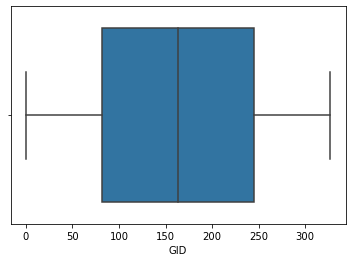

In [67]:
# boxplot of 'GID' column from imdb_genre
sns.boxplot(data=imdb_genre, x='GID')
plt.show()

No outliers are present in the 'GID' column 

In [68]:
# Checking for null values in imdb_genre
imdb_genre.isna().sum()

Name    0
GID     0
dtype: int64

Null values are not present in any columns

In [69]:
# Checking for duplicate rows in imdb_genre
imdb_genre[imdb_genre.duplicated()]

,Name,GID


No duplicate rows found in imdb_genre

In [70]:
# Removing extra space from 'Name' column
imdb_genre['Name'] = imdb_genre['Name'].str.strip(' ')

### Language

In [71]:
sql_query_language = """SELECT * FROM Language"""
imdb_language = pd.read_sql_query(sql_query_language, conne)

# First few rows of imdb_language
imdb_language.head()

,index,Name,LAID
0,0,English,0
1,1,Marathi,1
2,2,Hindi,2
3,3,Cantonese,3
4,4,Telugu,4


In [72]:
# Dropping 'index' column from imdb_language
imdb_language.drop('index', axis=1, inplace=True)

In [73]:
# Last few rows of imdb_language
imdb_language.tail()

,Name,LAID
27,Persian,27
28,Italian,28
29,Bhojpuri,29
30,Swiss German,30
31,Georgian,31


In [74]:
print("imdb_language shape:", imdb_language.shape)
print("imdb_language size:", imdb_language.size)
print("imdb_language columns:", imdb_language.columns)
print("imdb_language dimensions:", imdb_language.ndim)
print("imdb_language index:", imdb_language.index)

imdb_language shape: (32, 2)
imdb_language size: 64
imdb_language columns: Index(['Name', 'LAID'], dtype='object')
imdb_language dimensions: 2
imdb_language index: RangeIndex(start=0, stop=32, step=1)


In [75]:
# Info of imdb_language
imdb_language.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    32 non-null     object
 1   LAID    32 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 640.0+ bytes


In [76]:
# Statistical analysis using describe
imdb_language.describe(include='all')

,Name,LAID
count,32,32.000000
unique,32,NaN
top,English,NaN
freq,1,NaN
mean,NaN,15.500000
std,NaN,9.380832
min,NaN,0.000000
25%,NaN,7.750000
50%,NaN,15.500000
75%,NaN,23.250000


In [77]:
# Number of unique values in each column
imdb_language.nunique()

Name    32
LAID    32
dtype: int64

In [78]:
# Unique values in the 'Name' column
imdb_language['Name'].unique()

array(['English', 'Marathi', 'Hindi', 'Cantonese', 'Telugu', 'Mandarin',
       'Tamil', 'Punjabi', 'Danish', 'Korean', 'Spanish', 'Arabic',
       'Urdu', 'Tibetan', 'Dutch', 'Kannada', 'Japanese', 'Bengali',
       'Sinhalese', 'Malayalam', 'French', 'Russian', 'Gujarati',
       'Sanskrit', 'Himachali', 'Zulu', 'German', 'Persian', 'Italian',
       'Bhojpuri', 'Swiss German', 'Georgian'], dtype=object)

In [79]:
# Unique values in the 'LAID' column
imdb_language['LAID'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

In [80]:
# Value count of the 'Name' column
imdb_language['Name'].value_counts()

English         1
Marathi         1
Swiss German    1
Bhojpuri        1
Italian         1
Persian         1
German          1
Zulu            1
Himachali       1
Sanskrit        1
Gujarati        1
Russian         1
French          1
Malayalam       1
Sinhalese       1
Bengali         1
Japanese        1
Kannada         1
Dutch           1
Tibetan         1
Urdu            1
Arabic          1
Spanish         1
Korean          1
Danish          1
Punjabi         1
Tamil           1
Mandarin        1
Telugu          1
Cantonese       1
Hindi           1
Georgian        1
Name: Name, dtype: int64

In [81]:
# Value count of the 'LAID' column
imdb_language['LAID'].value_counts()

0     1
1     1
30    1
29    1
28    1
27    1
26    1
25    1
24    1
23    1
22    1
21    1
20    1
19    1
18    1
17    1
16    1
15    1
14    1
13    1
12    1
11    1
10    1
9     1
8     1
7     1
6     1
5     1
4     1
3     1
2     1
31    1
Name: LAID, dtype: int64

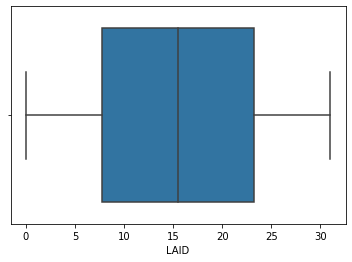

In [82]:
# boxplot of 'LAID' column from imdb_language
sns.boxplot(data=imdb_language, x='LAID')
plt.show()

No outliers are present in the 'LAID' column 

In [83]:
# Checking for null values in imdb_language
imdb_language.isna().sum()

Name    0
LAID    0
dtype: int64

Null values are not present in any columns

In [84]:
# Checking for duplicate rows in imdb_language
imdb_language[imdb_language.duplicated()]

,Name,LAID


No duplicate rows found in imdb_language

### Country

In [85]:
sql_query_country = """SELECT * FROM Country"""
imdb_country = pd.read_sql_query(sql_query_country, conne)

# First few rows of imdb_country
imdb_country.head()

,index,Name,CID
0,0,UK,0
1,1,USA,1
2,2,India,2
3,3,Australia,3
4,4,Hong Kong,4


In [86]:
# Dropping 'index' column from
imdb_country.drop('index', axis=1, inplace=True)

In [87]:
# Last few rows of imdb_country
imdb_country.tail()

,Name,CID
29,Sweden,29
30,Spain,30
31,Italy,31
32,New Zealand,32
33,Georgia,33


In [88]:
print("imdb_country shape:", imdb_country.shape)
print("imdb_country size:", imdb_country.size)
print("imdb_country columns:", imdb_country.columns)
print("imdb_country dimensions:", imdb_country.ndim)
print("imdb_country index:", imdb_country.index)

imdb_country shape: (34, 2)
imdb_country size: 68
imdb_country columns: Index(['Name', 'CID'], dtype='object')
imdb_country dimensions: 2
imdb_country index: RangeIndex(start=0, stop=34, step=1)


In [89]:
# Info of imdb_country
imdb_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    34 non-null     object
 1   CID     34 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 672.0+ bytes


In [90]:
# Statistical analysis using describe
imdb_country.describe(include='all')

,Name,CID
count,34,34.000000
unique,34,NaN
top,UK,NaN
freq,1,NaN
mean,NaN,16.500000
std,NaN,9.958246
min,NaN,0.000000
25%,NaN,8.250000
50%,NaN,16.500000
75%,NaN,24.750000


In [91]:
# Number of unique values in each column
imdb_country.nunique()

Name    34
CID     34
dtype: int64

In [92]:
# Unique values in the 'Name' column
imdb_country['Name'].unique()

array(['UK', 'USA', 'India', 'Australia', 'Hong Kong', 'Germany',
       'Canada', 'Denmark', 'Belgium', 'South Korea', 'China',
       'Argentina', 'Libya', 'Switzerland', 'Netherlands', 'France',
       'Pakistan', 'Japan', 'Sri Lanka', 'United Arab Emirates', 'Bhutan',
       'Soviet Union', 'Iceland', 'Afghanistan', 'South Africa', 'Egypt',
       'Hungary', 'Iran', 'Suriname', 'Sweden', 'Spain', 'Italy',
       'New Zealand', 'Georgia'], dtype=object)

In [93]:
# Unique values in the 'CID' column
imdb_country['CID'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33],
      dtype=int64)

In [94]:
# Value count of the 'Name' column
imdb_country['Name'].value_counts()

UK                      1
Egypt                   1
United Arab Emirates    1
Bhutan                  1
Soviet Union            1
Iceland                 1
Afghanistan             1
South Africa            1
Hungary                 1
USA                     1
Iran                    1
Suriname                1
Sweden                  1
Spain                   1
Italy                   1
New Zealand             1
Sri Lanka               1
Japan                   1
Pakistan                1
France                  1
Netherlands             1
Switzerland             1
Libya                   1
Argentina               1
China                   1
South Korea             1
Belgium                 1
Denmark                 1
Canada                  1
Germany                 1
Hong Kong               1
Australia               1
India                   1
Georgia                 1
Name: Name, dtype: int64

In [95]:
# Value count of the 'CID' column
imdb_country['CID'].value_counts()

0     1
25    1
19    1
20    1
21    1
22    1
23    1
24    1
26    1
1     1
27    1
28    1
29    1
30    1
31    1
32    1
18    1
17    1
16    1
15    1
14    1
13    1
12    1
11    1
10    1
9     1
8     1
7     1
6     1
5     1
4     1
3     1
2     1
33    1
Name: CID, dtype: int64

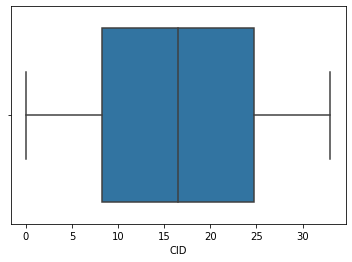

In [96]:
# boxplot of 'CID' column from imdb_country
sns.boxplot(data=imdb_country, x='CID')
plt.show()

No outliers are present in the 'CID' column 

In [97]:
# Checking for null values in imdb_country
imdb_country.isna().sum()

Name    0
CID     0
dtype: int64

Null values are not present in any columns

In [98]:
# Checking for duplicate rows in imdb_country
imdb_country[imdb_country.duplicated()]

,Name,CID


No duplicate rows found in imdb_country

### location

In [99]:
sql_query_location = """SELECT * FROM location"""
imdb_location = pd.read_sql_query(sql_query_location, conne)

# First few rows of imdb_location
imdb_location.head()

,index,Name,LID
0,0,"Durban, South Africa",0
1,1,"New York City, New York, USA",1
2,2,"Cape Town Film Studios, Cape Town, Western Cap...",2
3,3,"Pittsburgh, Pennsylvania, USA",3
4,4,"Atlanta, Georgia, USA",4


In [100]:
# Dropping 'index' column from imdb_location
imdb_location.drop('index', axis=1, inplace=True)

In [101]:
# Last few rows of imdb_location
imdb_location.tail()

,Name,LID
554,"Perumbavoor, Kerala, India",554
555,"Jersey City, New Jersey, USA",555
556,"Berner Oberland, Kanton Bern, Switzerland",556
557,"Aeroporti, Tbilisi, Georgia",557
558,"Aftab Studio, India",558


In [102]:
print("imdb_location shape:", imdb_location.shape)
print("imdb_location size:", imdb_location.size)
print("imdb_location columns:", imdb_location.columns)
print("imdb_location dimensions:", imdb_location.ndim)
print("imdb_location index:", imdb_location.index)

imdb_location shape: (559, 2)
imdb_location size: 1118
imdb_location columns: Index(['Name', 'LID'], dtype='object')
imdb_location dimensions: 2
imdb_location index: RangeIndex(start=0, stop=559, step=1)


In [103]:
# Info of imdb_location
imdb_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    559 non-null    object
 1   LID     559 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 8.9+ KB


In [104]:
# Statistical analysis using describe
imdb_location.describe(include='all')

,Name,LID
count,559,559.000000
unique,559,NaN
top,"Durban, South Africa",NaN
freq,1,NaN
mean,NaN,279.000000
std,NaN,161.513673
min,NaN,0.000000
25%,NaN,139.500000
50%,NaN,279.000000
75%,NaN,418.500000


In [105]:
# Number of unique values in each column
imdb_location.nunique()

Name    559
LID     559
dtype: int64

In [106]:
# Unique values in the 'Name' column
imdb_location['Name'].unique()

array(['Durban, South Africa', 'New York City, New York, USA',
       'Cape Town Film Studios, Cape Town, Western Cape, South Africa',
       'Pittsburgh, Pennsylvania, USA', 'Atlanta, Georgia, USA',
       'Hobart, Tasmania, Australia', 'Hong Kong, China', 'India',
       'Las Vegas, Nevada, USA',
       'Mobile Civic Center, Civic Center Drive, Mobile, Alabama, USA',
       'Montréal, Québec, Canada', 'Hungary', 'Toronto, Ontario, Canada',
       'Sihore, Madhya Pradesh, India', 'Malta',
       'Adelaide, South Australia, Australia', 'Mumbai, India',
       'Bara Hall Park, Hayes, Middlesex, England, UK',
       'Ludhiana, Punjab, India',
       'Lincoln Memorial, National Mall, Washington, District of Columbia, USA',
       'Sierra de Organos, Sombrerete, Zacatecas, Mexico',
       'Brooklyn, New York, USA', 'Canada', 'Bangalore, Karnataka, India',
       'Panchgani, Maharashtra, India', 'Rajasthan, India', 'France',
       'Varanasi, Uttar Pradesh, India',
       'Campbell River, B

In [107]:
# Unique values in the 'LID' column
imdb_location['LID'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [108]:
# Value count of the 'Name' column
imdb_location['Name'].value_counts()

Durban, South Africa                                  1
Ashoka Hotel, Bangalore, Karnataka, India             1
Ansal Plaza, New Delhi, Delhi, India                  1
Steep Holm, Bristol Channel, Somerset, England, UK    1
Aarey Milk Colony, Mumbai, Maharashtra, India         1
                                                     ..
Hyderabad, Telangana, India                           1
Chennai, Tamil Nadu, India                            1
Bhopal, India                                         1
Moscow, Russia                                        1
Aftab Studio, India                                   1
Name: Name, Length: 559, dtype: int64

In [109]:
# Value count of the 'LID' column
imdb_location['LID'].value_counts()

0      1
375    1
369    1
370    1
371    1
      ..
180    1
179    1
178    1
177    1
558    1
Name: LID, Length: 559, dtype: int64

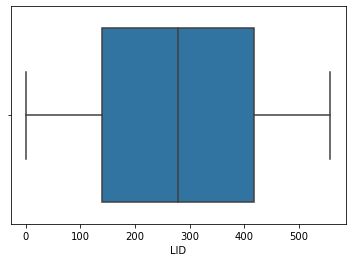

In [110]:
# boxplot of 'LID' column from imdb_location
sns.boxplot(data=imdb_location, x='LID')
plt.show()

No outliers are present in the 'LID' column 

In [111]:
# Checking for null values in imdb_location
imdb_location.isna().sum()

Name    0
LID     0
dtype: int64

Null values are not present in any columns

In [112]:
# Checking for duplicate rows in imdb_location
imdb_location[imdb_location.duplicated()]

,Name,LID


No duplicate rows found in imdb_location

### M_Producer

In [113]:
sql_query_M_producer = """SELECT * FROM M_Producer"""
imdb_M_producer = pd.read_sql_query(sql_query_M_producer, conne)

# First few rows of imdb_M_producer
imdb_M_producer.head()

,index,MID,PID,ID
0,0,tt2388771,nm0057655,0
1,1,tt2388771,nm0147080,1
2,2,tt2388771,nm0389414,2
3,3,tt2388771,nm0460141,3
4,4,tt2388771,nm0672248,4


In [114]:
# Dropping 'index' column from
imdb_M_producer.drop('index', axis=1, inplace=True)

In [115]:
# Last few rows of imdb_M_producer
imdb_M_producer.tail()

,MID,PID,ID
11744,tt0852989,nm2371237,11746
11745,tt0852989,nm2371184,11747
11746,tt0852989,nm1246080,11748
11747,tt0375882,None,11749
11748,tt0375890,nm1421793,11750


In [116]:
print("imdb_M_producer shape:", imdb_M_producer.shape)
print("imdb_M_producer size:", imdb_M_producer.size)
print("imdb_M_producer columns:", imdb_M_producer.columns)
print("imdb_M_producer dimensions:", imdb_M_producer.ndim)
print("imdb_M_producer index:", imdb_M_producer.index)

imdb_M_producer shape: (11749, 3)
imdb_M_producer size: 35247
imdb_M_producer columns: Index(['MID', 'PID', 'ID'], dtype='object')
imdb_M_producer dimensions: 2
imdb_M_producer index: RangeIndex(start=0, stop=11749, step=1)


In [117]:
# Info of imdb_M_producer
imdb_M_producer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11749 entries, 0 to 11748
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   MID     11749 non-null  object
 1   PID     11730 non-null  object
 2   ID      11749 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 275.5+ KB


In [118]:
# Statistical analysis using describe
imdb_M_producer.describe(include='all')

,MID,PID,ID
count,11749,11730,11749.000000
unique,3473,5436,NaN
top,tt2575290,nm0780098,NaN
freq,40,60,NaN
mean,NaN,NaN,5874.066048
std,NaN,NaN,3391.895799
min,NaN,NaN,0.000000
25%,NaN,NaN,2937.000000
50%,NaN,NaN,5874.000000
75%,NaN,NaN,8811.000000


In [119]:
# Number of unique values in each column
imdb_M_producer.nunique()

MID     3473
PID     5436
ID     11749
dtype: int64

In [120]:
# Unique values in the 'MID' column
imdb_M_producer['MID'].unique()

array(['tt2388771', 'tt5164214', 'tt1365519', ..., 'tt0852989',
       'tt0375882', 'tt0375890'], dtype=object)

In [121]:
# Unique values in the 'PID' column
imdb_M_producer['PID'].unique()

array([' nm0057655', ' nm0147080', ' nm0389414', ..., ' nm2371184',
       ' nm1246080', ' nm1421793'], dtype=object)

In [122]:
# Unique values in the 'ID' column
imdb_M_producer['ID'].unique()

array([    0,     1,     2, ..., 11748, 11749, 11750], dtype=int64)

In [123]:
# Value count of the 'MID' column
imdb_M_producer['MID'].value_counts()

tt2575290    40
tt5461944    33
tt2350496    27
tt1629295    26
tt1411956    23
             ..
tt0358020     1
tt1582601     1
tt0085165     1
tt0373935     1
tt0375890     1
Name: MID, Length: 3473, dtype: int64

In [124]:
# Value count of the 'PID' column
imdb_M_producer['PID'].value_counts()

 nm0780098    60
 nm0159147    54
 nm0080319    53
 nm4482460    53
 nm1024685    47
              ..
 nm1768431     1
 nm1226200     1
 nm1768441     1
 nm4424681     1
 nm1421793     1
Name: PID, Length: 5436, dtype: int64

In [125]:
# Value count of the 'ID' column
imdb_M_producer['ID'].value_counts()

0        1
7826     1
7828     1
7829     1
7830     1
        ..
3918     1
3919     1
3920     1
3921     1
11750    1
Name: ID, Length: 11749, dtype: int64

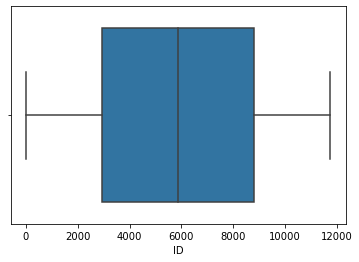

In [126]:
# boxplot of 'ID' column from imdb_M_producer
sns.boxplot(data=imdb_M_producer, x='ID')
plt.show()

No outliers are present in the 'ID' column 

In [127]:
# Checking for null values in imdb_M_producer
imdb_M_producer.isna().sum()

MID     0
PID    19
ID      0
dtype: int64

Null values are present in 'PID' column

In [128]:
# Treating null values in 'PID' column from imdb_M_producer
imdb_M_producer['PID'] = imdb_M_producer['PID'].fillna('Unknown')

# Again checking for null values in imdb_M_producer
imdb_M_producer.isna().sum()

MID    0
PID    0
ID     0
dtype: int64

In [129]:
# Checking for duplicate rows in imdb_M_producer
imdb_M_producer[imdb_M_producer.duplicated()]

,MID,PID,ID


No duplicate rows found in imdb_M_producer

### M_Director

In [130]:
sql_query_M_director = """SELECT * FROM M_Director"""
imdb_M_director = pd.read_sql_query(sql_query_M_director, conne)

# First few rows of imdb_M_director
imdb_M_director.head()

,index,MID,PID,ID
0,0,tt2388771,nm0785227,0
1,1,tt5164214,nm0002657,1
2,2,tt1365519,nm1012385,2
3,3,tt0848228,nm0923736,3
4,4,tt8239946,nm9751348,4


In [131]:
# Dropping 'index' column from imdb_M_director
imdb_M_director.drop('index', axis=1, inplace=True)

In [132]:
# Last few rows of imdb_M_director
imdb_M_director.tail()

,MID,PID,ID
3468,tt0090611,nm0220823,3470
3469,tt0106270,nm0613517,3471
3470,tt0852989,nm2312263,3472
3471,tt0375882,nm0066829,3473
3472,tt0375890,nm1421793,3474


In [133]:
print("imdb_M_director shape:", imdb_M_director.shape)
print("imdb_M_director size:", imdb_M_director.size)
print("imdb_M_director columns:", imdb_M_director.columns)
print("imdb_M_director dimensions:", imdb_M_director.ndim)
print("imdb_M_director index:", imdb_M_director.index)

imdb_M_director shape: (3473, 3)
imdb_M_director size: 10419
imdb_M_director columns: Index(['MID', 'PID', 'ID'], dtype='object')
imdb_M_director dimensions: 2
imdb_M_director index: RangeIndex(start=0, stop=3473, step=1)


In [134]:
# Info of imdb_M_director
imdb_M_director.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3473 entries, 0 to 3472
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   MID     3473 non-null   object
 1   PID     3473 non-null   object
 2   ID      3473 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 81.5+ KB


In [135]:
# Statistical analysis using describe
imdb_M_director.describe(include='all')

,MID,PID,ID
count,3473,3473,3473.000000
unique,3473,1462,NaN
top,tt2388771,nm0223522,NaN
freq,1,39,NaN
mean,NaN,NaN,1736.105096
std,NaN,NaN,1002.877540
min,NaN,NaN,0.000000
25%,NaN,NaN,868.000000
50%,NaN,NaN,1736.000000
75%,NaN,NaN,2604.000000


In [136]:
# Number of unique values in each column
imdb_M_director.nunique()

MID    3473
PID    1462
ID     3473
dtype: int64

In [137]:
# Unique values in the 'MID' column
imdb_M_director['MID'].unique()

array(['tt2388771', 'tt5164214', 'tt1365519', ..., 'tt0852989',
       'tt0375882', 'tt0375890'], dtype=object)

In [138]:
# Unique values in the 'PID' column
imdb_M_director['PID'].unique()

array(['nm0785227', 'nm0002657', 'nm1012385', ..., 'nm0474806',
       'nm0066829', 'nm1421793'], dtype=object)

In [139]:
# Unique values in the 'ID' column
imdb_M_director['ID'].unique()

array([   0,    1,    2, ..., 3472, 3473, 3474], dtype=int64)

In [140]:
# Value count of the 'MID' column
imdb_M_director['MID'].value_counts()

tt2388771    1
tt0286907    1
tt0070097    1
tt0264415    1
tt0140784    1
            ..
tt1372266    1
tt0110140    1
tt3422462    1
tt0345177    1
tt0375890    1
Name: MID, Length: 3473, dtype: int64

In [141]:
# Value count of the 'PID' column
imdb_M_director['PID'].value_counts()

nm0223522    39
nm0080315    35
nm0890060    30
nm0698184    30
nm0080333    29
             ..
nm4824234     1
nm1414846     1
nm1070287     1
nm3328918     1
nm1421793     1
Name: PID, Length: 1462, dtype: int64

In [142]:
# Value count of the 'ID' column
imdb_M_director['ID'].value_counts()

0       1
2320    1
2309    1
2310    1
2311    1
       ..
1161    1
1162    1
1163    1
1164    1
3474    1
Name: ID, Length: 3473, dtype: int64

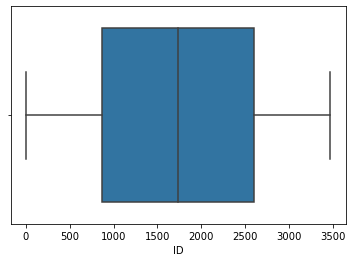

In [143]:
# boxplot of 'ID' column from imdb_M_director
sns.boxplot(data=imdb_M_director, x='ID')
plt.show()

No outliers are present in the 'ID' column 

In [144]:
# Checking for null values in imdb_M_director
imdb_M_director.isna().sum()

MID    0
PID    0
ID     0
dtype: int64

Null values are not present in any columns

In [145]:
# Checking for duplicate rows in imdb_M_director
imdb_M_director[imdb_M_director.duplicated()]

,MID,PID,ID


No duplicate rows found in imdb_M_director

### M_Cast

In [146]:
sql_query_M_cast = """SELECT * FROM M_Cast"""
imdb_M_cast = pd.read_sql_query(sql_query_M_cast, conne)

# First few rows of imdb_M_cast
imdb_M_cast.head()

,index,MID,PID,ID
0,0,tt2388771,nm0000288,0
1,1,tt2388771,nm0000949,1
2,2,tt2388771,nm1212722,2
3,3,tt2388771,nm0365140,3
4,4,tt2388771,nm0785227,4


In [147]:
# Dropping 'index' column from
imdb_M_cast.drop('index', axis=1, inplace=True)

In [148]:
# Last few rows of imdb_M_cast
imdb_M_cast.tail()

,MID,PID,ID
82830,tt0375890,nm0664109,82832
82831,tt0375890,nm0505323,82833
82832,tt0375890,nm0019427,82834
82833,tt0375890,nm0197582,82835
82834,tt0375890,nm0438467,82836


In [149]:
print("imdb_M_cast shape:", imdb_M_cast.shape)
print("imdb_M_cast size:", imdb_M_cast.size)
print("imdb_M_cast columns:", imdb_M_cast.columns)
print("imdb_M_cast dimensions:", imdb_M_cast.ndim)
print("imdb_M_cast index:", imdb_M_cast.index)

imdb_M_cast shape: (82835, 3)
imdb_M_cast size: 248505
imdb_M_cast columns: Index(['MID', 'PID', 'ID'], dtype='object')
imdb_M_cast dimensions: 2
imdb_M_cast index: RangeIndex(start=0, stop=82835, step=1)


In [150]:
# Info of imdb_M_cast
imdb_M_cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82835 entries, 0 to 82834
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   MID     82835 non-null  object
 1   PID     82835 non-null  object
 2   ID      82835 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.9+ MB


In [151]:
# Statistical analysis using describe
imdb_M_cast.describe(include='all')

,MID,PID,ID
count,82835,82835,82835.000000
unique,3473,32127,NaN
top,tt5164214,nm0451600,NaN
freq,238,243,NaN
mean,NaN,NaN,41417.072771
std,NaN,NaN,23912.666593
min,NaN,NaN,0.000000
25%,NaN,NaN,20708.500000
50%,NaN,NaN,41417.000000
75%,NaN,NaN,62125.500000


In [152]:
# Number of unique values in each column
imdb_M_cast.nunique()

MID     3473
PID    32127
ID     82835
dtype: int64

In [153]:
# Unique values in the 'MID' column
imdb_M_cast['MID'].unique()

array(['tt2388771', 'tt5164214', 'tt1365519', ..., 'tt0852989',
       'tt0375882', 'tt0375890'], dtype=object)

In [154]:
# Unique values in the 'PID' column
imdb_M_cast['PID'].unique()

array([' nm0000288', ' nm0000949', ' nm1212722', ..., ' nm2370589',
       ' nm1866356', ' nm0066829'], dtype=object)

In [155]:
# Unique values in the 'ID' column
imdb_M_cast['ID'].unique()

array([    0,     1,     2, ..., 82834, 82835, 82836], dtype=int64)

In [156]:
# Value count of the 'MID' column
imdb_M_cast['MID'].value_counts()

tt5164214    238
tt0451631    233
tt6173990    215
tt1188996    213
tt3498820    191
            ... 
tt6246170      1
tt1169841      1
tt5049906      1
tt8338754      1
tt0375882      1
Name: MID, Length: 3473, dtype: int64

In [157]:
# Value count of the 'PID' column
imdb_M_cast['PID'].value_counts()

 nm0451600    243
 nm0007106    225
 nm0000821    204
 nm0004109    200
 nm2147526    186
             ... 
 nm7197040      1
 nm0746976      1
 nm1213738      1
 nm4574155      1
 nm0066829      1
Name: PID, Length: 32127, dtype: int64

In [158]:
# Value count of the 'ID' column
imdb_M_cast['ID'].value_counts()

0        1
55250    1
55228    1
55227    1
55226    1
        ..
27610    1
27609    1
27608    1
27607    1
82836    1
Name: ID, Length: 82835, dtype: int64

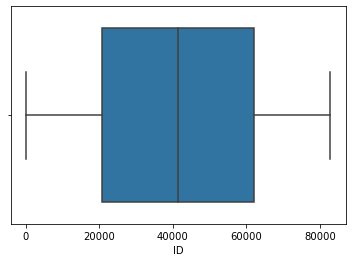

In [159]:
# boxplot of 'ID' column from imdb_M_cast
sns.boxplot(data=imdb_M_cast, x='ID')
plt.show()

No outliers are present in the 'ID' column 

In [160]:
# Checking for null values in imdb_M_cast
imdb_M_cast.isna().sum()

MID    0
PID    0
ID     0
dtype: int64

Null values are not present in any columns

In [161]:
# Checking for duplicate rows in imdb_M_cast
imdb_M_cast[imdb_M_cast.duplicated()]

,MID,PID,ID


No duplicate rows found in imdb_M_cast

### M_Genre

In [162]:
sql_query_M_genre = """SELECT * FROM M_Genre"""
imdb_M_genre = pd.read_sql_query(sql_query_M_genre, conne)

# First few rows of imdb_M_genre
imdb_M_genre.head()

,index,MID,GID,ID
0,0,tt2388771,0,0
1,1,tt5164214,1,1
2,2,tt1365519,2,2
3,3,tt0848228,3,3
4,4,tt8239946,4,4


In [163]:
# Dropping 'index' column from
imdb_M_genre.drop('index', axis=1, inplace=True)

In [164]:
# Last few rows of imdb_M_genre
imdb_M_genre.tail()

,MID,GID,ID
3468,tt0090611,46,3470
3469,tt0106270,20,3471
3470,tt0852989,19,3472
3471,tt0375882,309,3473
3472,tt0375890,46,3474


In [165]:
print("imdb_M_genre shape:", imdb_M_genre.shape)
print("imdb_M_genre size:", imdb_M_genre.size)
print("imdb_M_genre columns:", imdb_M_genre.columns)
print("imdb_M_genre dimensions:", imdb_M_genre.ndim)
print("imdb_M_genre index:", imdb_M_genre.index)

imdb_M_genre shape: (3473, 3)
imdb_M_genre size: 10419
imdb_M_genre columns: Index(['MID', 'GID', 'ID'], dtype='object')
imdb_M_genre dimensions: 2
imdb_M_genre index: RangeIndex(start=0, stop=3473, step=1)


In [166]:
# Info of imdb_M_genre
imdb_M_genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3473 entries, 0 to 3472
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   MID     3473 non-null   object
 1   GID     3473 non-null   int64 
 2   ID      3473 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 81.5+ KB


In [167]:
# Statistical analysis using describe
imdb_M_genre.describe(include='all')

,MID,GID,ID
count,3473,3473.000000,3473.000000
unique,3473,NaN,NaN
top,tt2388771,NaN,NaN
freq,1,NaN,NaN
mean,NaN,62.634322,1736.105096
std,NaN,65.283050,1002.877540
min,NaN,0.000000,0.000000
25%,NaN,19.000000,868.000000
50%,NaN,46.000000,1736.000000
75%,NaN,76.000000,2604.000000


In [168]:
# Number of unique values in each column
imdb_M_genre.nunique()

MID    3473
GID     327
ID     3473
dtype: int64

In [169]:
# Unique values in the 'MID' column
imdb_M_genre['MID'].unique()

array(['tt2388771', 'tt5164214', 'tt1365519', ..., 'tt0852989',
       'tt0375882', 'tt0375890'], dtype=object)

In [170]:
# Unique values in the 'GID' column
imdb_M_genre['GID'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [171]:
# Unique values in the 'ID' column
imdb_M_genre['ID'].unique()

array([   0,    1,    2, ..., 3472, 3473, 3474], dtype=int64)

In [172]:
# Value count of the 'MID' column
imdb_M_genre['MID'].value_counts()

tt2388771    1
tt0286907    1
tt0070097    1
tt0264415    1
tt0140784    1
            ..
tt1372266    1
tt0110140    1
tt3422462    1
tt0345177    1
tt0375890    1
Name: MID, Length: 3473, dtype: int64

In [173]:
# Value count of the 'GID' column
imdb_M_genre['GID'].value_counts()

19     342
54     218
5      206
20     149
16     137
      ... 
210      1
211      1
212      1
213      1
327      1
Name: GID, Length: 327, dtype: int64

In [174]:
# Value count of the 'ID' column
imdb_M_genre['ID'].value_counts()

0       1
2320    1
2309    1
2310    1
2311    1
       ..
1161    1
1162    1
1163    1
1164    1
3474    1
Name: ID, Length: 3473, dtype: int64

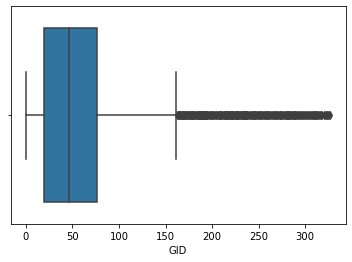

In [175]:
# boxplot of 'GID' column from imdb_M_genre
sns.boxplot(data=imdb_M_genre, x='GID')
plt.show()

- Outliers are present in the 'GID' column 
- We might need all 'GID' columns values so outliers are not removed in the dataset.

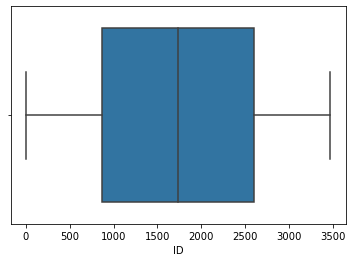

In [176]:
# boxplot of 'ID' column from imdb_M_genre
sns.boxplot(data=imdb_M_genre, x='ID')
plt.show()

No outliers are present in the 'ID' column 

In [177]:
# Checking for null values in imdb_M_genre
imdb_M_genre.isna().sum()

MID    0
GID    0
ID     0
dtype: int64

Null values are not present in any columns

In [178]:
# Checking for duplicate rows in imdb_M_genre
imdb_M_genre[imdb_M_genre.duplicated()]

,MID,GID,ID


No duplicate rows found in imdb_M_genre

### M_Language

In [179]:
sql_query_M_language = """SELECT * FROM M_Language"""
imdb_M_language = pd.read_sql_query(sql_query_M_language, conne)

# First few rows of imdb_M_language
imdb_M_language.head()

,index,MID,LAID,ID
0,0,tt2388771,0,0
1,1,tt5164214,0,1
2,2,tt1365519,0,2
3,3,tt0848228,0,3
4,4,tt8239946,1,4


In [180]:
# Dropping 'index' column from
imdb_M_language.drop('index', axis=1, inplace=True)

In [181]:
# Last few rows of imdb_M_language
imdb_M_language.tail()

,MID,LAID,ID
3468,tt0090611,2,3470
3469,tt0106270,2,3471
3470,tt0852989,2,3472
3471,tt0375882,2,3473
3472,tt0375890,2,3474


In [182]:
print("imdb_M_language shape:", imdb_M_language.shape)
print("imdb_M_language size:", imdb_M_language.size)
print("imdb_M_language columns:", imdb_M_language.columns)
print("imdb_M_language dimensions:", imdb_M_language.ndim)
print("imdb_M_language index:", imdb_M_language.index)

imdb_M_language shape: (3473, 3)
imdb_M_language size: 10419
imdb_M_language columns: Index(['MID', 'LAID', 'ID'], dtype='object')
imdb_M_language dimensions: 2
imdb_M_language index: RangeIndex(start=0, stop=3473, step=1)


In [183]:
# Info of imdb_M_language
imdb_M_language.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3473 entries, 0 to 3472
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   MID     3473 non-null   object
 1   LAID    3473 non-null   int64 
 2   ID      3473 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 81.5+ KB


In [184]:
# Statistical analysis using describe
imdb_M_language.describe(include='all')

,MID,LAID,ID
count,3473,3473.000000,3473.000000
unique,3473,NaN,NaN
top,tt2388771,NaN,NaN
freq,1,NaN,NaN
mean,NaN,2.552836,1736.105096
std,NaN,2.811091,1002.877540
min,NaN,0.000000,0.000000
25%,NaN,2.000000,868.000000
50%,NaN,2.000000,1736.000000
75%,NaN,2.000000,2604.000000


In [185]:
# Number of unique values in each column
imdb_M_language.nunique()

MID     3473
LAID      32
ID      3473
dtype: int64

In [186]:
# Unique values in the 'MID' column
imdb_M_language['MID'].unique()

array(['tt2388771', 'tt5164214', 'tt1365519', ..., 'tt0852989',
       'tt0375882', 'tt0375890'], dtype=object)

In [187]:
# Unique values in the 'LAID' column
imdb_M_language['LAID'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

In [188]:
# Unique values in the 'ID' column
imdb_M_language['ID'].unique()

array([   0,    1,    2, ..., 3472, 3473, 3474], dtype=int64)

In [189]:
# Value count of the 'MID' column
imdb_M_language['MID'].value_counts()

tt2388771    1
tt0286907    1
tt0070097    1
tt0264415    1
tt0140784    1
            ..
tt1372266    1
tt0110140    1
tt3422462    1
tt0345177    1
tt0375890    1
Name: MID, Length: 3473, dtype: int64

In [190]:
# Value count of the 'LAID' column
imdb_M_language['LAID'].value_counts()

2     2988
0      151
6       98
4       93
15      29
17      17
1       17
12      17
19      16
7       11
3        4
11       3
14       3
27       3
22       3
9        2
5        2
20       2
30       1
29       1
24       1
28       1
26       1
25       1
16       1
23       1
21       1
18       1
13       1
10       1
8        1
31       1
Name: LAID, dtype: int64

In [191]:
# Value count of the 'ID' column
imdb_M_language['ID'].value_counts()

0       1
2320    1
2309    1
2310    1
2311    1
       ..
1161    1
1162    1
1163    1
1164    1
3474    1
Name: ID, Length: 3473, dtype: int64

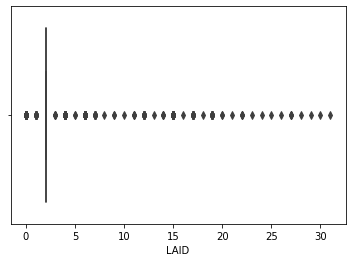

In [192]:
# boxplot of 'LAID' column from imdb_M_language
sns.boxplot(data=imdb_M_language, x='LAID')
plt.show()

- Outliers are present in the column 'LAID'
- We might require all 'LAID' columns values so outliers are not removed in the dataset

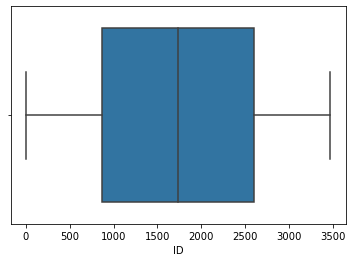

In [193]:
# boxplot of 'ID' column from imdb_M_language
sns.boxplot(data=imdb_M_language, x='ID')
plt.show()

No outliers are present in the 'ID' column 

In [194]:
# Checking for null values in imdb_M_language
imdb_M_language.isna().sum()

MID     0
LAID    0
ID      0
dtype: int64

Null values are not present in any columns

In [195]:
# Checking for duplicate rows in imdb_M_language
imdb_M_language[imdb_M_language.duplicated()]

,MID,LAID,ID


No duplicate rows found in imdb_M_language

### M_Country

In [196]:
sql_query_M_country = """SELECT * FROM M_Country"""
imdb_M_country = pd.read_sql_query(sql_query_M_country, conne)

# First few rows of imdb_M_country
imdb_M_country.head()

,index,MID,CID,ID
0,0,tt2388771,0.0,0
1,1,tt5164214,1.0,1
2,2,tt1365519,0.0,2
3,3,tt0848228,1.0,3
4,4,tt8239946,2.0,4


In [197]:
# Dropping 'index' column from
imdb_M_country.drop('index', axis=1, inplace=True)

In [198]:
# Last few rows of imdb_M_country
imdb_M_country.tail()

,MID,CID,ID
3468,tt0090611,2.0,3470
3469,tt0106270,2.0,3471
3470,tt0852989,2.0,3472
3471,tt0375882,2.0,3473
3472,tt0375890,2.0,3474


In [199]:
print("imdb_M_country shape:", imdb_M_country.shape)
print("imdb_M_country size:", imdb_M_country.size)
print("imdb_M_country columns:", imdb_M_country.columns)
print("imdb_M_country dimensions:", imdb_M_country.ndim)
print("imdb_M_country index:", imdb_M_country.index)

imdb_M_country shape: (3473, 3)
imdb_M_country size: 10419
imdb_M_country columns: Index(['MID', 'CID', 'ID'], dtype='object')
imdb_M_country dimensions: 2
imdb_M_country index: RangeIndex(start=0, stop=3473, step=1)


In [200]:
# Info of imdb_M_country
imdb_M_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3473 entries, 0 to 3472
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MID     3473 non-null   object 
 1   CID     3468 non-null   float64
 2   ID      3473 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 81.5+ KB


In [201]:
# Statistical analysis using describe
imdb_M_country.describe(include='all')

,MID,CID,ID
count,3473,3468.000000,3473.000000
unique,3473,NaN,NaN
top,tt2388771,NaN,NaN
freq,1,NaN,NaN
mean,NaN,2.170127,1736.105096
std,NaN,1.927562,1002.877540
min,NaN,0.000000,0.000000
25%,NaN,2.000000,868.000000
50%,NaN,2.000000,1736.000000
75%,NaN,2.000000,2604.000000


In [202]:
# Number of unique values in each column
imdb_M_country.nunique()

MID    3473
CID      33
ID     3473
dtype: int64

In [203]:
# Unique values in the 'MID' column
imdb_M_country['MID'].unique()

array(['tt2388771', 'tt5164214', 'tt1365519', ..., 'tt0852989',
       'tt0375882', 'tt0375890'], dtype=object)

In [204]:
# Unique values in the 'CID' column
imdb_M_country['CID'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., nan, 23., 24.,
       25., 26., 27., 28., 29., 31., 32., 33.])

In [205]:
# Unique values in the 'ID' column
imdb_M_country['ID'].unique()

array([   0,    1,    2, ..., 3472, 3473, 3474], dtype=int64)

In [206]:
# Value count of the 'MID' column
imdb_M_country['MID'].value_counts()

tt2388771    1
tt0286907    1
tt0070097    1
tt0264415    1
tt0140784    1
            ..
tt1372266    1
tt0110140    1
tt3422462    1
tt0345177    1
tt0375890    1
Name: MID, Length: 3473, dtype: int64

In [207]:
# Value count of the 'CID' column
imdb_M_country['CID'].value_counts()

2.0     3295
1.0       65
0.0       41
6.0       16
16.0       6
3.0        4
5.0        3
13.0       3
4.0        3
9.0        3
15.0       3
21.0       2
27.0       2
14.0       2
10.0       2
23.0       1
28.0       1
29.0       1
26.0       1
31.0       1
25.0       1
32.0       1
24.0       1
19.0       1
22.0       1
20.0       1
18.0       1
17.0       1
12.0       1
11.0       1
8.0        1
7.0        1
33.0       1
Name: CID, dtype: int64

In [208]:
# Value count of the 'ID' column
imdb_M_country['ID'].value_counts()

0       1
2320    1
2309    1
2310    1
2311    1
       ..
1161    1
1162    1
1163    1
1164    1
3474    1
Name: ID, Length: 3473, dtype: int64

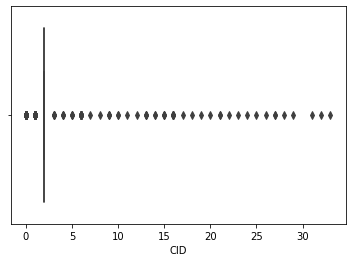

In [209]:
# boxplot of 'CID' column from imdb_M_country
sns.boxplot(data=imdb_M_country, x='CID')
plt.show()

- Outliers are present in the column 'CID'
- But we might need all 'CID' columns values so outliers are not removed in the dataset

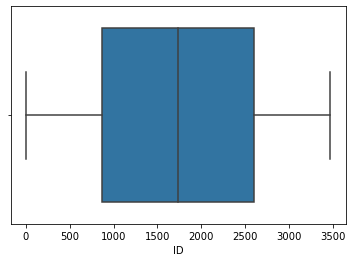

In [210]:
# boxplot of 'ID' column from imdb_M_country
sns.boxplot(data=imdb_M_country, x='ID')
plt.show()

No outliers are present in the 'ID' column 

In [211]:
# Checking for null values in imdb_M_country
imdb_M_country.isna().sum()

MID    0
CID    5
ID     0
dtype: int64

Null values are present in the 'CID' column

In [212]:
# Treating null values in 'CID' column from imdb_M_country
imdb_M_country['CID'] = imdb_M_country['CID'].fillna('Unknown')

# Again checking for null values in imdb_M_country
imdb_M_country.isna().sum()

MID    0
CID    0
ID     0
dtype: int64

In [213]:
# Checking for duplicate rows in imdb_M_country
imdb_M_country[imdb_M_country.duplicated()]

,MID,CID,ID


No duplicate rows found in imdb_M_country

### M_Location

In [214]:
sql_query_M_location = """SELECT * FROM M_Location"""
imdb_M_location = pd.read_sql_query(sql_query_M_location, conne)

# First few rows of imdb_M_location
imdb_M_location.head()

,index,MID,LID,ID
0,0,tt2388771,0.0,0
1,1,tt5164214,1.0,1
2,2,tt1365519,2.0,2
3,3,tt0848228,3.0,3
4,4,tt8239946,NaN,4


In [215]:
# Dropping 'index' column from
imdb_M_location.drop('index', axis=1, inplace=True)

In [216]:
# Last few rows of imdb_M_location
imdb_M_location.tail()

,MID,LID,ID
3468,tt0090611,219.0,3470
3469,tt0106270,NaN,3471
3470,tt0852989,164.0,3472
3471,tt0375882,NaN,3473
3472,tt0375890,7.0,3474


In [217]:
print("imdb_M_location shape:", imdb_M_location.shape)
print("imdb_M_location size:", imdb_M_location.size)
print("imdb_M_location columns:", imdb_M_location.columns)
print("imdb_M_location dimensions:", imdb_M_location.ndim)
print("imdb_M_location index:", imdb_M_location.index)

imdb_M_location shape: (3473, 3)
imdb_M_location size: 10419
imdb_M_location columns: Index(['MID', 'LID', 'ID'], dtype='object')
imdb_M_location dimensions: 2
imdb_M_location index: RangeIndex(start=0, stop=3473, step=1)


In [218]:
# Info of imdb_M_location
imdb_M_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3473 entries, 0 to 3472
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MID     3473 non-null   object 
 1   LID     1849 non-null   float64
 2   ID      3473 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 81.5+ KB


In [219]:
# Statistical analysis using describe
imdb_M_location.describe(include='all')

,MID,LID,ID
count,3473,1849.000000,3473.000000
unique,3473,NaN,NaN
top,tt2388771,NaN,NaN
freq,1,NaN,NaN
mean,NaN,166.055706,1736.105096
std,NaN,150.188459,1002.877540
min,NaN,0.000000,0.000000
25%,NaN,35.000000,868.000000
50%,NaN,124.000000,1736.000000
75%,NaN,259.000000,2604.000000


In [220]:
# Number of unique values in each column
imdb_M_location.nunique()

MID    3473
LID     559
ID     3473
dtype: int64

In [221]:
# Unique values in the 'MID' column
imdb_M_location['MID'].unique()

array(['tt2388771', 'tt5164214', 'tt1365519', ..., 'tt0852989',
       'tt0375882', 'tt0375890'], dtype=object)

In [222]:
# Unique values in the 'LID' column
imdb_M_location['LID'].unique()

array([  0.,   1.,   2.,   3.,  nan,   4.,   5.,   6.,   7.,   8.,   9.,
        10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,
        21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,
        32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,
        43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,
        54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,
        65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,
        76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,
        87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,
        98.,  99., 100., 101., 102., 103., 104., 105., 106., 107., 108.,
       109., 110., 111., 112., 113., 114., 115., 116., 117., 118., 119.,
       120., 121., 122., 123., 124., 125., 126., 127., 128., 129., 130.,
       131., 132., 133., 134., 135., 136., 137., 138., 139., 140., 141.,
       142., 143., 144., 145., 146., 147., 148., 14

In [223]:
# Unique values in the 'ID' column
imdb_M_location['ID'].unique()

array([   0,    1,    2, ..., 3472, 3473, 3474], dtype=int64)

In [224]:
# Value count of the 'MID' column
imdb_M_location['MID'].value_counts()

tt2388771    1
tt0286907    1
tt0070097    1
tt0264415    1
tt0140784    1
            ..
tt1372266    1
tt0110140    1
tt3422462    1
tt0345177    1
tt0375890    1
Name: MID, Length: 3473, dtype: int64

In [225]:
# Value count of the 'LID' column
imdb_M_location['LID'].value_counts()

7.0      262
44.0     137
34.0      99
219.0     48
212.0     39
        ... 
232.0      1
231.0      1
230.0      1
229.0      1
558.0      1
Name: LID, Length: 559, dtype: int64

In [226]:
# Value count of the 'MID' column
imdb_M_location['ID'].value_counts()

0       1
2320    1
2309    1
2310    1
2311    1
       ..
1161    1
1162    1
1163    1
1164    1
3474    1
Name: ID, Length: 3473, dtype: int64

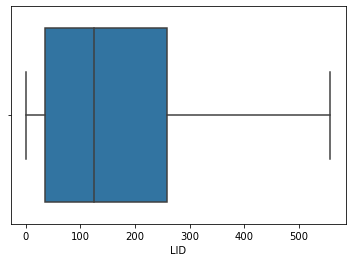

In [227]:
# boxplot of 'LID' column from imdb_M_location
sns.boxplot(data=imdb_M_location, x='LID')
plt.show()

No outliers are present in the 'LID' column 

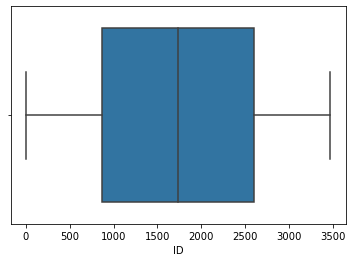

In [228]:
# boxplot of 'ID' column from imdb_M_location
sns.boxplot(data=imdb_M_location, x='ID')
plt.show()

No outliers are present in the 'ID' column 

In [229]:
# Checking for null values in imdb_M_location
imdb_M_location.isna().sum()

MID       0
LID    1624
ID        0
dtype: int64

Null values are present in 'LID' column

In [230]:
# Treating null values in 'LID' column from imdb_M_location 
imdb_M_location['LID'] = imdb_M_location['LID'].fillna('Unknown')

# Again checking for null values in imdb_M_location
imdb_M_location.isna().sum()

MID    0
LID    0
ID     0
dtype: int64

In [231]:
# Checking for duplicate rows in imdb_M_location
imdb_M_location[imdb_M_location.duplicated()]

,MID,LID,ID


No duplicate rows found in imdb_M_location

## Analysis of Director

In [232]:
# Merging imdb_movie and imdb_M_director on 'MID' column
movie_m_director = imdb_movie.merge(imdb_M_director, on='MID')
movie_m_director.head()

,MID,title,year,rating,num_votes,log_num_votes,n_year,bin_rating,PID,ID
0,tt2388771,Mowgli,2018,6.6,21967,9.997297,2018,6-10 rating,nm0785227,0
1,tt5164214,Ocean's Eight,2018,6.2,110861,11.616032,2018,6-10 rating,nm0002657,1
2,tt1365519,Tomb Raider,2018,6.4,142585,11.867694,2018,6-10 rating,nm1012385,2
3,tt0848228,The Avengers,2012,8.1,1137529,13.944369,2012,6-10 rating,nm0923736,3
4,tt8239946,Tumbbad,2018,8.5,7483,8.920389,2018,6-10 rating,nm9751348,4


Here 'ID' column has director's id

In [233]:
# Renaming 'ID' column to 'Director_ID' column
movie_m_director.rename(columns={'ID':'Director_ID'}, inplace=True)

In [234]:
# Merging imdb_person and movie_m_director on 'PID' column
movie_person_director = imdb_person.merge(movie_m_director, on='PID')
movie_person_director.head()

,PID,Name,Gender,MID,title,year,rating,num_votes,log_num_votes,n_year,bin_rating,Director_ID
0,nm0785227,Andy Serkis,Male,tt2388771,Mowgli,2018,6.6,21967,9.997297,2018,6-10 rating,0
1,nm0001162,Griffin Dunne,Male,tt0809504,The Accidental Husband,2008,5.6,21636,9.982114,2008,6-10 rating,76
2,nm0438501,Rishi Kapoor,Male,tt0149568,Aa Ab Laut Chalen,1999,5.5,1386,7.234177,1999,6-10 rating,2568
3,nm0795661,Saurabh Shukla,Male,tt1340778,I Am 24,2010,6.7,1130,7.029973,2010,6-10 rating,2294
4,nm0795661,Saurabh Shukla,Male,tt1772332,Pappu Can't Dance Saala,2010,6.5,384,5.950643,2010,6-10 rating,2404


Here 'Name' column has directors Name

In [235]:
# Renaming 'Name' column to 'Director_Name' column
movie_person_director.rename(columns={'Name':'Director_Name'}, inplace=True)

In [236]:
# Count of female and male directors 
movie_person_director.groupby('Gender')['Director_ID'].count()

Gender
Female       32
Male        294
Unknown    3064
Name: Director_ID, dtype: int64

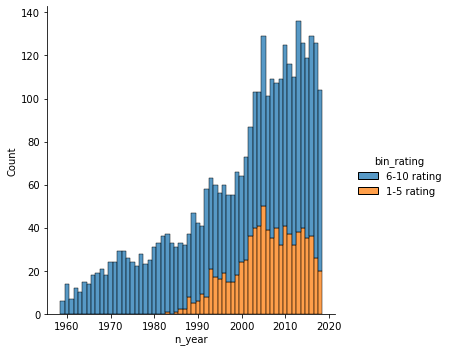

In [237]:
# Displot of 'n_year' where hue is 'bin_rating' column
sns.displot(data=movie_person_director, x='n_year', hue='bin_rating', discrete=True, multiple='stack')
plt.show()

The movies with '1–5 rating' started to appear in the plot after the year 1980.

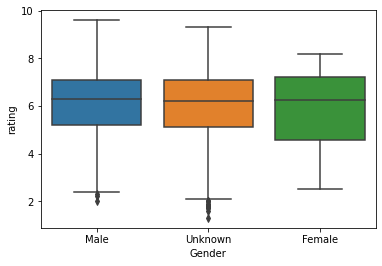

In [238]:
# boxplot of 'Gender' and 'rating' from movie_person_director
sns.boxplot(data=movie_person_director, x='Gender', y='rating')
plt.show()

The 'Male' and 'Female' have the same median

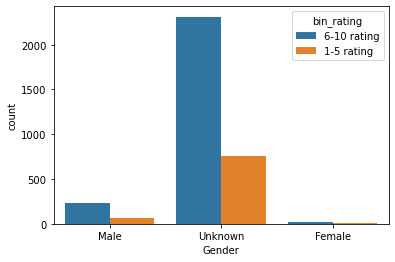

In [239]:
# boxplot of 'Gender' where hue is 'bin_rating' from movie_person_director
sns.countplot(data=movie_person_director, x='Gender', hue='bin_rating')
plt.show()

Both 'Male' and 'Female' directors have more movies with a '6–10 rating' than a '1–5 rating'

### Who are the top 7 directors with the highest count of movies?

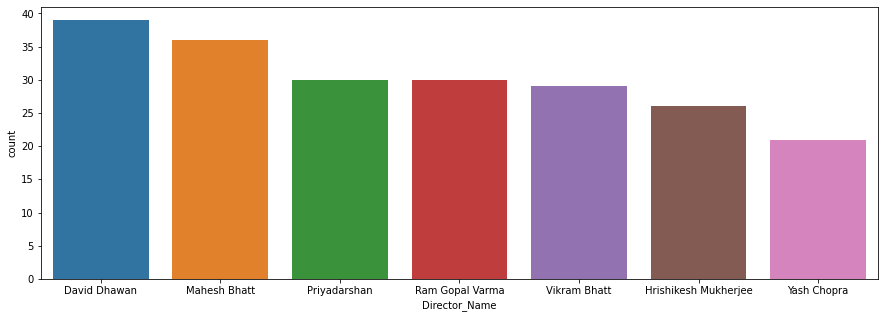

In [240]:
plt.figure(figsize=(15, 5))
sns.countplot(data=movie_person_director, x='Director_Name', 
              order=movie_person_director['Director_Name'].value_counts().index[:7])
plt.show()

Director David Dhawan has the highest count of movies 

### Which directors have at least one movie with a rating greater than 9?

In [241]:
director_high_rating = movie_person_director[movie_person_director['rating']>9][['Director_Name', 'title', 'rating']]
director_high_rating

,Director_Name,title,rating
431,Abbas,Man on Mission Taqatwar,9.5
826,Nagarjuna Akkineni,Dilwale:The Brave Heart,9.3
1039,Mohan Babu,Main Hoon Khiladiyon Ka Khiladi,9.4
1041,Mohan Babu,Man on Mission Fauladi,9.6
1042,Mohan Babu,Mahakali Ka Insaaf,9.6
1043,Mohan Babu,Military Officer,9.4
1131,Kireet Khurana,T for Taj Mahal,9.3
3057,Sumnash Sri Kaljai,Leera the Soulmate,9.2
3324,Renjie,Gospel Movie: Who Is My Lord,9.1


### Which directors have more than one movie with a rating greater than 9? 

In [242]:
director_high_rating['Director_Name'].value_counts().index[director_high_rating['Director_Name'].value_counts().values>1]

Index(['Mohan Babu'], dtype='object')

### Which director has a movie with highest number of voting?

In [243]:
movie_person_director[movie_person_director['num_votes']==movie_person_director['num_votes'].max()][[
    'Director_Name', 'title', 'n_year', 'num_votes']]

,Director_Name,title,n_year,num_votes
2249,Joss Whedon,The Avengers,2012,1137529


### Director - Movie - Language

In [244]:
# Merging movie_person_director and imdb_M_language on the 'MID' column
movie_person_director_mlang = movie_person_director.merge(imdb_M_language, on='MID')
movie_person_director_mlang.head()

,PID,Director_Name,Gender,MID,title,year,rating,num_votes,log_num_votes,n_year,bin_rating,Director_ID,LAID,ID
0,nm0785227,Andy Serkis,Male,tt2388771,Mowgli,2018,6.6,21967,9.997297,2018,6-10 rating,0,0,0
1,nm0001162,Griffin Dunne,Male,tt0809504,The Accidental Husband,2008,5.6,21636,9.982114,2008,6-10 rating,76,0,76
2,nm0438501,Rishi Kapoor,Male,tt0149568,Aa Ab Laut Chalen,1999,5.5,1386,7.234177,1999,6-10 rating,2568,2,2568
3,nm0795661,Saurabh Shukla,Male,tt1340778,I Am 24,2010,6.7,1130,7.029973,2010,6-10 rating,2294,2,2294
4,nm0795661,Saurabh Shukla,Male,tt1772332,Pappu Can't Dance Saala,2010,6.5,384,5.950643,2010,6-10 rating,2404,2,2404


In [245]:
# Renaming the 'ID' column to the 'm_lang_ID' column from movie_person_director_mlang
movie_person_director_mlang.rename(columns={'ID':'m_lang_ID'}, inplace = True)

In [246]:
# Merging movie_person_director_mlang and imdb_language on the 'LAID' column
director_language = movie_person_director_mlang.merge(imdb_language, on='LAID')
director_language.head()

,PID,Director_Name,Gender,MID,title,year,rating,num_votes,log_num_votes,n_year,bin_rating,Director_ID,LAID,m_lang_ID,Name
0,nm0785227,Andy Serkis,Male,tt2388771,Mowgli,2018,6.6,21967,9.997297,2018,6-10 rating,0,0,0,English
1,nm0001162,Griffin Dunne,Male,tt0809504,The Accidental Husband,2008,5.6,21636,9.982114,2008,6-10 rating,76,0,76,English
2,nm0000187,Madonna,Unknown,tt1042499,Filth and Wisdom,2008,5.6,2319,7.748891,2008,6-10 rating,774,0,774,English
3,nm0149446,Gurinder Chadha,Unknown,tt0286499,Bend It Like Beckham,2002,6.7,97876,11.491457,2002,6-10 rating,25,0,25,English
4,nm0149446,Gurinder Chadha,Unknown,tt0361411,Bride & Prejudice,2004,6.2,18827,9.843047,2004,6-10 rating,88,0,88,English


In [247]:
# Renaming the 'Name' column to the 'Language_Name' column from director_language
director_language.rename(columns={'Name':'Language_Name'}, inplace = True)

### Find the director of the highest-rated movie in each language.

In [248]:
director_language[['Director_Name', 'title', 'rating', 'Language_Name']].sort_values(
    by=['Language_Name', 'rating'], ascending=[True, False]).groupby('Language_Name')[
    ['Director_Name', 'title', 'rating']].agg(Director_Name=('Director_Name', 'first'),
                                                Movie_Title=('title', 'first'),
                                                Movie_Rating=('rating', 'first'))

,Director_Name,Movie_Title,Movie_Rating
Language_Name,,,
Arabic,Moustapha Akkad,Al-risâlah,8.9
Bengali,Mrinal Sen,Aamaar Bhuvan,8.0
Bhojpuri,Abhishek Chhadha,Ganga,5.0
Cantonese,Kar-Wai Wong,Chung Hing sam lam,8.1
Danish,Susanne Bier,Efter brylluppet,7.8
Dutch,Pim de la Parra,Wan Pipel,6.9
English,Renjie,Gospel Movie: Who Is My Lord,9.1
French,Eric Gravel,Crash Test Aglaé,6.5
Georgian,Avtandil Varsimashvili,Kvelaferi kargad iqneba,6.0


### Director- Movie-  Country

In [249]:
# Merging movie_person_director and imdb_M_country on the 'MID' column
movie_person_director_country = movie_person_director.merge(imdb_M_country, on='MID')
movie_person_director_country.head()

,PID,Director_Name,Gender,MID,title,year,rating,num_votes,log_num_votes,n_year,bin_rating,Director_ID,CID,ID
0,nm0785227,Andy Serkis,Male,tt2388771,Mowgli,2018,6.6,21967,9.997297,2018,6-10 rating,0,0.0,0
1,nm0001162,Griffin Dunne,Male,tt0809504,The Accidental Husband,2008,5.6,21636,9.982114,2008,6-10 rating,76,1.0,76
2,nm0438501,Rishi Kapoor,Male,tt0149568,Aa Ab Laut Chalen,1999,5.5,1386,7.234177,1999,6-10 rating,2568,2.0,2568
3,nm0795661,Saurabh Shukla,Male,tt1340778,I Am 24,2010,6.7,1130,7.029973,2010,6-10 rating,2294,2.0,2294
4,nm0795661,Saurabh Shukla,Male,tt1772332,Pappu Can't Dance Saala,2010,6.5,384,5.950643,2010,6-10 rating,2404,2.0,2404


In [250]:
# Renaming the 'ID' column to the 'country_ID' column from movie_person_director_country
movie_person_director_country.rename(columns={'ID':'Country_ID'}, inplace = True)

In [251]:
# Converting the 'CID' column to the 'int64' datatype
movie_person_director_country['CID'] = imdb_country['CID'].astype('int64')

# Merging movie_person_director_country and imdb_country on the 'CID' column
director_country = movie_person_director_country.merge(imdb_country, on='CID')
director_country.head()

,PID,Director_Name,Gender,MID,title,year,rating,num_votes,log_num_votes,n_year,bin_rating,Director_ID,CID,Country_ID,Name
0,nm0785227,Andy Serkis,Male,tt2388771,Mowgli,2018,6.6,21967,9.997297,2018,6-10 rating,0,0.0,0,UK
1,nm0001162,Griffin Dunne,Male,tt0809504,The Accidental Husband,2008,5.6,21636,9.982114,2008,6-10 rating,76,1.0,76,USA
2,nm0438501,Rishi Kapoor,Male,tt0149568,Aa Ab Laut Chalen,1999,5.5,1386,7.234177,1999,6-10 rating,2568,2.0,2568,India
3,nm0795661,Saurabh Shukla,Male,tt1340778,I Am 24,2010,6.7,1130,7.029973,2010,6-10 rating,2294,3.0,2294,Australia
4,nm0795661,Saurabh Shukla,Male,tt1772332,Pappu Can't Dance Saala,2010,6.5,384,5.950643,2010,6-10 rating,2404,4.0,2404,Hong Kong


In [252]:
# Renaming the 'Name' column to the 'Country_Name' column from director_country
director_country.rename(columns={'Name':'Country_Name'}, inplace = True)

### Which director has movies in the most number of countries?

In [253]:
director_country.groupby('Director_Name')[
    'Country_Name'].count().index.max(), director_country.groupby('Director_Name')['Country_Name'].count().values.max()

('Vijay Raaz', 15)

### Director- Movie- Location

In [254]:
# Merging movie_person_director and imdb_M_location on the 'MID' column
movie_person_director_location  = movie_person_director.merge(imdb_M_location, on='MID')
movie_person_director_location.head()

,PID,Director_Name,Gender,MID,title,year,rating,num_votes,log_num_votes,n_year,bin_rating,Director_ID,LID,ID
0,nm0785227,Andy Serkis,Male,tt2388771,Mowgli,2018,6.6,21967,9.997297,2018,6-10 rating,0,0.0,0
1,nm0001162,Griffin Dunne,Male,tt0809504,The Accidental Husband,2008,5.6,21636,9.982114,2008,6-10 rating,76,48.0,76
2,nm0438501,Rishi Kapoor,Male,tt0149568,Aa Ab Laut Chalen,1999,5.5,1386,7.234177,1999,6-10 rating,2568,7.0,2568
3,nm0795661,Saurabh Shukla,Male,tt1340778,I Am 24,2010,6.7,1130,7.029973,2010,6-10 rating,2294,44.0,2294
4,nm0795661,Saurabh Shukla,Male,tt1772332,Pappu Can't Dance Saala,2010,6.5,384,5.950643,2010,6-10 rating,2404,Unknown,2404


In [255]:
# Renaming the 'ID' column to the 'location_ID' column from movie_person_director_location
movie_person_director_location.rename(columns={'ID':'Location_ID'}, inplace = True)

In [256]:
# Converting the 'LID' column to the 'int64' datatype
movie_person_director_location['LID'] = imdb_location['LID'].astype('int64')

# Merging movie_person_director_location and imdb_location on the 'LID' column
director_location = movie_person_director_location.merge(imdb_location, on='LID')
director_location.head()

,PID,Director_Name,Gender,MID,title,year,rating,num_votes,log_num_votes,n_year,bin_rating,Director_ID,LID,Location_ID,Name
0,nm0785227,Andy Serkis,Male,tt2388771,Mowgli,2018,6.6,21967,9.997297,2018,6-10 rating,0,0.0,0,"Durban, South Africa"
1,nm0001162,Griffin Dunne,Male,tt0809504,The Accidental Husband,2008,5.6,21636,9.982114,2008,6-10 rating,76,1.0,76,"New York City, New York, USA"
2,nm0438501,Rishi Kapoor,Male,tt0149568,Aa Ab Laut Chalen,1999,5.5,1386,7.234177,1999,6-10 rating,2568,2.0,2568,"Cape Town Film Studios, Cape Town, Western Cap..."
3,nm0795661,Saurabh Shukla,Male,tt1340778,I Am 24,2010,6.7,1130,7.029973,2010,6-10 rating,2294,3.0,2294,"Pittsburgh, Pennsylvania, USA"
4,nm0795661,Saurabh Shukla,Male,tt1772332,Pappu Can't Dance Saala,2010,6.5,384,5.950643,2010,6-10 rating,2404,4.0,2404,"Atlanta, Georgia, USA"


In [257]:
# Renaming 'Name' column to 'Location_Name' column from director_location
director_location.rename(columns={'Name':'Location_Name'}, inplace = True)

### What are top 7 country locations used most by the directors?

In [258]:
director_location['Location_Country'] = director_location['Location_Name'].str.split(',').str[-1].str.strip(' ')
countrt_loc = director_location['Location_Country'].value_counts().index[:7]

for cl in countrt_loc:
    print(cl)

India
UK
USA
Canada
Australia
Thailand
Switzerland


### Insights

- Over the years 1959–2018, the number of movies is increasing.
- The 6–10 rating movies are more than 1–5 rating.
- 'Male' and 'Female' directors both of them have more movies with a '6–10 rating' than a '1–5 rating'.
- David Dhawa, Mahesh Bhatt, Priyadarshan, Ram Gopal Verma, Vikram Bhatt, Hrishikesh Mukherjee, and Yash Chopra are the top 7 directors with the highest count of movies.
- Directors Abbas, Nagarjuna Akkineni, Mohan Babu, Kireet Khurana, Sumnash Sri Kaljai, and Renjie have at least one movie with a rating greater than 9.
- The director Mohan Babu has more than one movie with a rating greater than 9.
- The director Joss Whedon has a movie with the highest number of voting.
- Director of the highest-rated movie in that language: Director Renjie in the English language,  Director Mohan Babu in the Hindi language, Director Anurag Singh in the Punjabi language, Director Mrinal Sen in the Bengali language, Director Dhorairaj Bhagavan in the Kannada language.
- The director Vijay Raaz has movies in the most number of countries. 
- India, the UK, the USA, Canada, Australia, Thailand, and Switzerland are the top 7 country locations used most by the directors.